**Import the necessary libraries**

In [161]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


**Import Data**

In [162]:
# reads the CSV file 'E-commerce-data.csv' and converts it into a Pandas DataFrame using the 'unicode_escape' encoding
df = pd.read_csv('E-commerce-data.csv',encoding='unicode_escape')

In [163]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [164]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [165]:
df.shape

(541909, 8)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [167]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Data PreProcessing**

In [168]:
df_clean = df.dropna(subset=['CustomerID'])

In [169]:
df_clean.shape

(406829, 8)

Text(0.5, 1.0, 'Distribution of Unitprice')

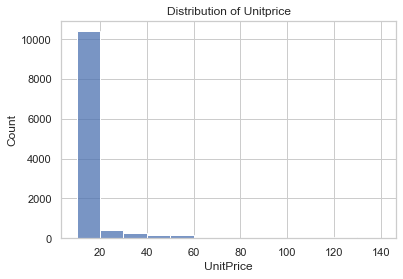

In [170]:
sns.histplot(data=df_clean, x="UnitPrice", bins = list(range(10, 150, 10)))
plt.title("Distribution of Unitprice")

The most Products that customers buy are belong to the unit price range of 10-30

In [171]:
# converts the values in the 'InvoiceDate' column to datetime format for easier manipulation and analysis of the data
df_clean['Date']= pd.to_datetime(df_clean['InvoiceDate'])

Using the customer buying behavior features “Quantity”, “InvoiceDate” and “UnitPrice, we are going to derive a customer’s RFM profile - Recency, Frequency, Monetary Value.

We will analyse and do customer segmentation based on their purchasing behavior.

**Recency Measurement** Refers to how recently a customer has made a purchase on the platform



In [172]:
# Ranking customers based on their date of purchase  
df_clean['rank'] = df_clean.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int) 
df_clean


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,38
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,38
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,38
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,38


In [173]:
# select only the most recent purchase for each customer
data = df_clean[df_clean['rank']==1] 

In [174]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,2011-12-09 12:16:00,1
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,2011-12-09 12:16:00,1


In [175]:
#assign a recency score to each customerID , the number of days between each transaction and the earliest transaction
data['recency'] = (data['Date'] - pd.to_datetime(min(data['Date']))).dt.days

In [176]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,2011-12-09 12:16:00,1,373
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1,373
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1,373
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,2011-12-09 12:16:00,1,373


**Frequency Measurement**  Refers to how many times has each customer made a purchase on the platform



In [177]:
freq = data.groupby('CustomerID')['Date'].count()  #the number of transactions for each customer
print(freq)
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','frequency']

CustomerID
12346.0     1
12347.0    31
12348.0    17
12349.0    73
12350.0    17
           ..
18280.0    10
18281.0     7
18282.0     7
18283.0    57
18287.0    29
Name: Date, Length: 4372, dtype: int64


In [178]:
# combine the dataframes based on a the common column, which is CustomerID.
df_rec_freq = df_freq.merge(data,on='CustomerID')

In [179]:
df_rec_freq.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6


**Monetary Value** Refers to The total amount each customer have spent on the platform



In [180]:
df_rec_freq['total'] = df_rec_freq['Quantity']*df['UnitPrice'] 
amount = df_rec_freq.groupby('CustomerID')['total'].sum()  #the total amount spent by each customer
print(amount)
amount = pd.DataFrame(amount).reset_index()
amount.columns = ['CustomerID','monetary_value']
amount

CustomerID
12346.0    189248.25
12347.0      1246.73
12348.0      4311.90
12349.0      1618.81
12350.0       553.25
             ...    
18280.0       229.79
18281.0        92.29
18282.0       159.91
18283.0       201.54
18287.0       863.40
Name: total, Length: 4372, dtype: float64


,CustomerID,monetary_value
0,12346.0,189248.25
1,12347.0,1246.73
2,12348.0,4311.90
3,12349.0,1618.81
4,12350.0,553.25
...,...,...
4367,18280.0,229.79
4368,18281.0,92.29
4369,18282.0,159.91
4370,18283.0,201.54


In [181]:
# we merge dataframes
new_df = amount.merge(df_rec_freq,on='CustomerID')
new_df

,CustomerID,monetary_value,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency,total
0,12346.0,189248.25,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48,189248.25
1,12347.0,1246.73,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6,40.68
2,12347.0,1246.73,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6,11.00
3,12347.0,1246.73,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6,40.68
4,12347.0,1246.73,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6,122.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100805,18287.0,863.40,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,36,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172,70.20
100806,18287.0,863.40,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,60,5/22/2011 10:39,1.45,United Kingdom,2011-05-22 10:39:00,1,172,153.00
100807,18287.0,863.40,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,12,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172,30.60
100808,18287.0,863.40,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172,19.80


**Feature selection**

 To build the customer segmentation model we need just 4 features : CustomerID , recency , frequency , monetary_value

In [182]:
df1 = new_df[['CustomerID','recency','frequency','monetary_value']]
df1

,CustomerID,recency,frequency,monetary_value
0,12346.0,48,1,189248.25
1,12347.0,6,31,1246.73
2,12347.0,6,31,1246.73
3,12347.0,6,31,1246.73
4,12347.0,6,31,1246.73
...,...,...,...,...
100805,18287.0,172,29,863.40
100806,18287.0,172,29,863.40
100807,18287.0,172,29,863.40
100808,18287.0,172,29,863.40


**Detecting and removing outliers**

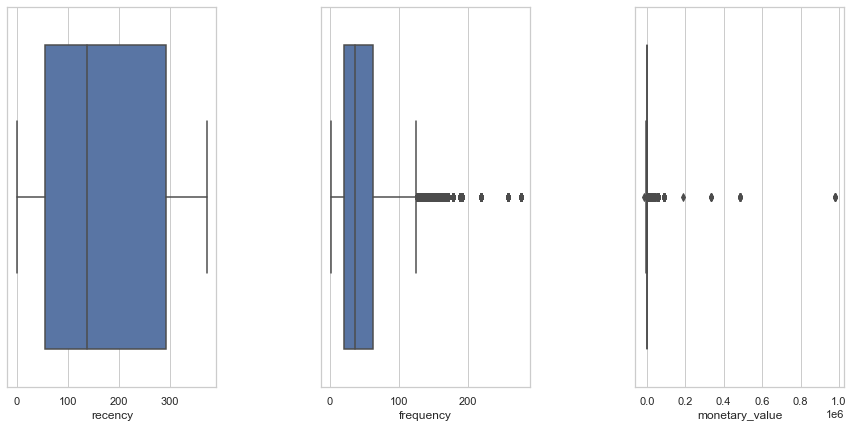

In [183]:
cols = ['recency','frequency','monetary_value']

plt.figure(1, figsize=(15,7))
n = 0
for cols in ['recency','frequency','monetary_value']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace= 1, wspace=0.5)
    sns.boxplot(x = cols,data = df1)
plt.show()

“Frequency” and “monetary_value” have outliers that must be removed.
We will use the Z-Score measurement to identify outliers (Z-Scores tell us how far away from the mean the data point is)

To remove outliers , we calculate the Z-scores for each data point in the DataFrame and then identifies outliers by comparing the absolute value of the Z-scores to our threshold value. the Output is DataFrame with only the non-outlier data points 

In [184]:
# remove the customer id column
rfm = df1[['recency','frequency','monetary_value']]
rfm = rfm.drop_duplicates()
# remove outliers
z_scores = stats.zscore(rfm) # calculate the Z-score for each data point in 'rfm'
# set the threshold value for the Z-score
threshold = 3
abs_z_scores = np.abs(z_scores) 
not_outliers = (abs_z_scores < threshold).all(axis=1)
#select only the non-outlier rows of the original DataFrame
rfm = rfm[not_outliers]
rfm

,recency,frequency,monetary_value
1,6,31,1246.73
32,15,17,4311.90
49,355,73,1618.81
122,63,17,553.25
139,77,15,947.61
...,...,...,...
100700,96,10,229.79
100710,193,7,92.29
100717,247,7,159.91
100724,36,57,201.54


**Standardization** 

Scale the dataset’s values so that they follow a normal distribution , also the algorithm we will use to build the model is sensitive to the scale of the data. If the data is not scaled, the features with larger values will dominate the algorithm and bias the model towards those features. By scaling the data, we can ensure that all features contribute equally to the model.


In [185]:
from sklearn.preprocessing import StandardScaler
col_names = ['recency', 'frequency', 'monetary_value']
features = rfm[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features

,recency,frequency,monetary_value
0,-1.194109,0.536023,0.155834
1,-1.117781,-0.228705,1.685372
2,1.765686,2.830208,0.341505
3,-0.710704,-0.228705,-0.190216
4,-0.591973,-0.337952,0.006572
...,...,...,...
4285,-0.430838,-0.611070,-0.351625
4286,0.391798,-0.774940,-0.420238
4287,0.849761,-0.774940,-0.386495
4288,-0.939685,1.956232,-0.365721


**Build The Customer Segmentation model using K-Means clustering algorithm**

 We need to find the optimal number of clusters (visualize the elbow point)

Text(0, 0.5, 'Inertia')

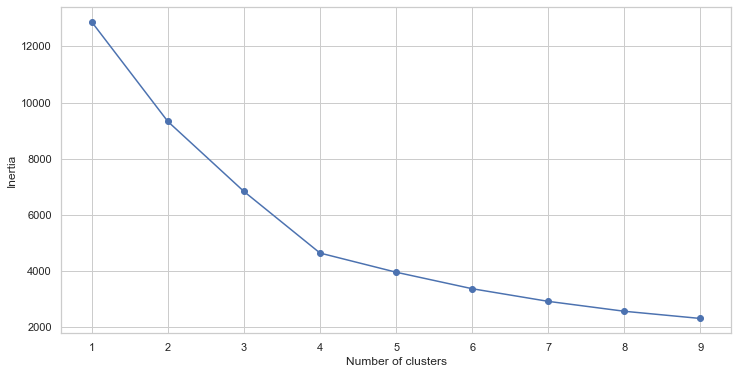

In [186]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
SSE = [] #store the sum of squared errors for each value of n_clusters
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
datafr = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(datafr['Cluster'], datafr['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

==> The optimal number of clusters to use in this K-Means algorithm is 4

In [187]:
# build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [188]:
#evaluate the quality of the clustering result
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.42835962923724064


The silhouette score is a metric used to evaluate the quality of a clustering result. It ranges from -1 to 1, with higher values indicating better clustering results. Here the silhouette score is 0.42 . This is a reasonable score and the clustering algorithm has done a relatively good job of separating the data points into distinct clusters. 


**Model Interpretation and Visualization**

In [189]:
prediction = kmeans.predict(scaled_features)
datafr = pd.DataFrame(rfm)
datafr['cluster'] = prediction #datafr includes the original data as well as the predicted cluster labels

In [190]:
datafr.head()

,recency,frequency,monetary_value,cluster
1,6,31,1246.73,0
32,15,17,4311.90,0
49,355,73,1618.81,1
122,63,17,553.25,0
139,77,15,947.61,0


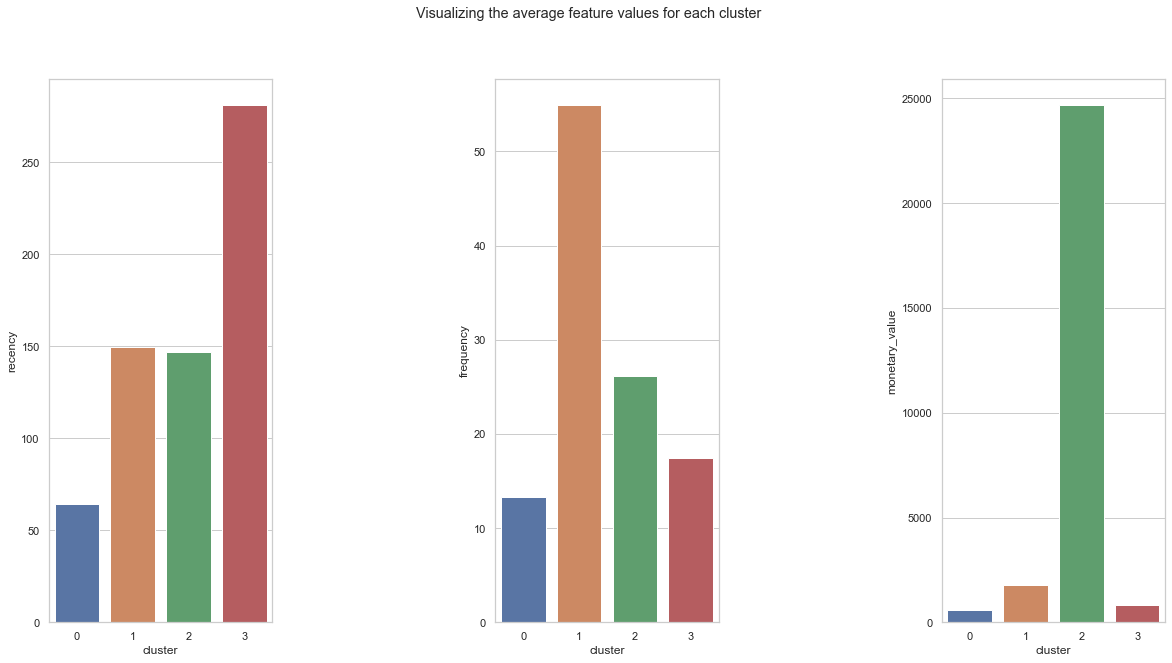

In [191]:
avg_df = datafr.groupby(['cluster'], as_index=False).mean()
figure= plt.figure(figsize=(20,10))
n=0
for i in col_names:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style = 'whitegrid')
  sns.barplot(x='cluster',y=str(i),data=avg_df)
plt.subplots_adjust(wspace=1)
figure.suptitle('Visualizing the average feature values for each cluster')
plt.show()





From visualizing the average feature values for each cluster, we gain insights into the characteristics of each cluster and we can make decisions based on the clustering results.

**cluster 0** : This cluster includes customers with low recency, frequency and monetary value scores . These are people who have made only a few purchases and have not been active in recent periods.


**cluster 1** : This cluster groups customers with medium recency, high frequency, and low monetary value scores . These are people who make frequent purchases of lower-priced items. 

**cluster 2** : This cluster includes customers with medium recency, medium frequency, and high monetary value scores . These are people who make regular purchases of higher-priced items.


**cluster 3** : This cluster groups customers  with high recency, medium frequency, and low monetary value scores. These are people who haven't made a purchase recently, but when they do, they tend to buy less expensive items. 







In [192]:
import plotly.express as px
fig = px.scatter_3d(data_frame=datafr, x="recency", 
                    y="frequency", z="monetary_value", color=datafr.cluster, height=650,
                   title = "Visualizing Cluster Result Using the 3 Features")
fig.show()